#  Project 
**Instructions** Use current stock data to create two potentially profitable investment portfolios. One that is higher risk and one that is lower risk.

### Project :Construction of High-Risk and Low-Risk Investment Portfolios Using Current Stock Data  
 A **high-risk portfolio** targeting higher potential returns but tolerating greater volatility.
 A **low-risk portfolio** focused on preserving capital while providing stable returns.

In [2]:
# Import Packages
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 
from scipy.optimize import minimize

#### Gathering Stock Data

In [3]:
#Download Stock Data 
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'NVDA', 'KO', 'JNJ', 'PG', 'PEP', 'XOM']

start_date = dt.datetime.today()-dt.timedelta(days=2*365) #data from last two years
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end =end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  10 of 10 completed


In [14]:
stock.head()

Price            Close                                                 \
Ticker            AAPL       GOOGL         JNJ         KO        MSFT   
Date                                                                    
2023-05-22  172.473175  124.454987  148.571442  57.878288  316.262268   
2023-05-23  169.859314  121.976837  148.514633  57.774784  310.432892   
2023-05-24  170.136536  120.324738  148.372559  57.285477  309.044495   
2023-05-25  171.275177  122.892456  146.241592  56.843227  320.929688   
2023-05-26  173.690948  124.017082  146.184784  56.702080  327.792969   

Price                                                                  ...  \
Ticker           NVDA         PEP          PG        TSLA         XOM  ...   
Date                                                                   ...   
2023-05-22  31.155766  175.438751  141.962509  188.869995   97.982841  ...   
2023-05-23  30.668079  174.902969  140.430222  185.770004   99.317657  ...   
2023-05-24  30.518179  173.793762  139.269089  182.899994  100.428429  ...   
2023-05-25  37.955353  172.769165  138.374435  184.470001   98.626915  ...   
2023-05-26  38.920723  172.562378  138.383942  193.169998   97.982841  ...   

Price         Volume                                                     \
Ticker          AAPL     GOOGL      JNJ        KO      MSFT        NVDA   
Date                                                                      
2023-05-22  43570900  35253000  5675900  15055400  24115700   372000000   
2023-05-23  50747300  34046300  5793000  13932700  30797200   356253000   
2023-05-24  45143500  34182600  5015100  11090100  23384900   721419000   
2023-05-25  56058300  42317000  6886100  14463600  43301700  1543911000   
2023-05-26  54835000  35635900  6845400  12570300  36630600   714397000   

Price                                              
Ticker          PEP       PG       TSLA       XOM  
Date                                               
2023-05-22  5787000  7876200  132001400  12882000  
2023-05-23  6382300  6116000  156952100  14394400  
2023-05-24  3721000  5755400  137605100  16340300  
2023-05-25  4712700  6510300   96870700  14316500  
2023-05-26  4449300  4716400  162061500  12370300  

[5 rows x 50 columns]

In [15]:
print(stock.head())

Price            Close                                                 \
Ticker            AAPL       GOOGL         JNJ         KO        MSFT   
Date                                                                    
2023-05-22  172.473175  124.454987  148.571442  57.878288  316.262268   
2023-05-23  169.859314  121.976837  148.514633  57.774784  310.432892   
2023-05-24  170.136536  120.324738  148.372559  57.285477  309.044495   
2023-05-25  171.275177  122.892456  146.241592  56.843227  320.929688   
2023-05-26  173.690948  124.017082  146.184784  56.702080  327.792969   

Price                                                                  ...  \
Ticker           NVDA         PEP          PG        TSLA         XOM  ...   
Date                                                                   ...   
2023-05-22  31.155766  175.438751  141.962509  188.869995   97.982841  ...   
2023-05-23  30.668079  174.902969  140.430222  185.770004   99.317657  ...   
2023-05-24  30.518179  17

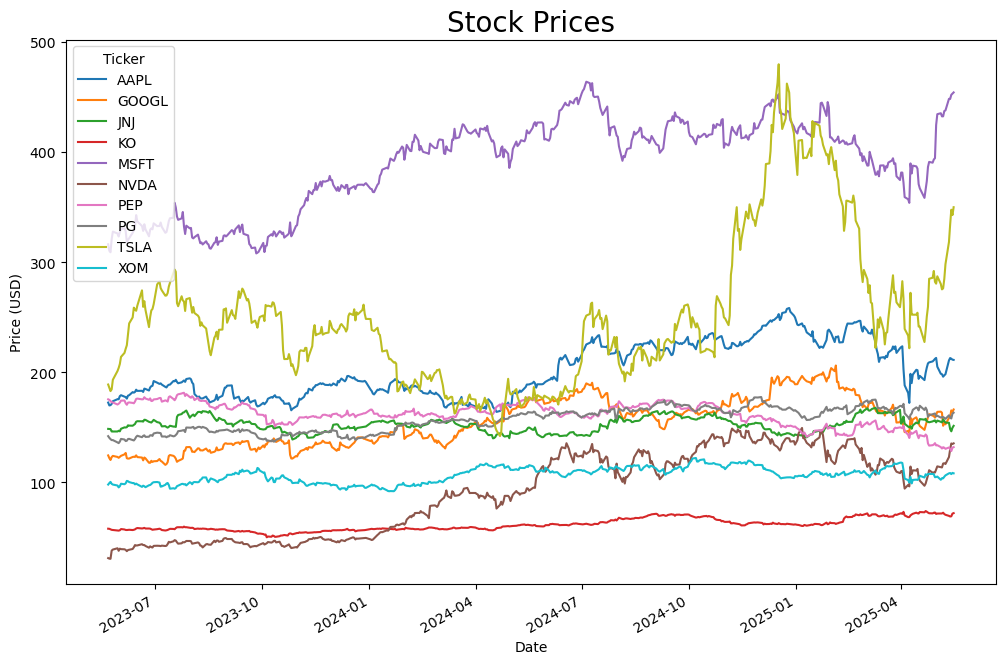

In [17]:
#Plot stock (close) prices together
stock['Close'].plot(figsize = (12,8))
plt.title(f'Stock Prices', size = 20)
plt.ylabel('Price (USD)')
plt.show()

In [20]:
#Add in column that is cumulative returns of the stocks

# Step 1: Compute cumulative return from 'Close' prices
close = stock['Close'] #Get 'Close' prices
normalized_returns = close/close.iloc[0]-1 #Compute cumulative return (normalized to start at 0)
                                           #Moves stock prices to a start of 0
# Step 2: Create MultiIndex columns for new data
normalized_returns.columns = pd.MultiIndex.from_product([['Cumulative Return'], normalized_returns.columns])
                                                                               
# Step 3: Concatenate to the original DataFrame
if 'Cumulative Return' in stock.columns.get_level_values(0):
    stock = stock.drop(columns='Cumulative Return', level=0)
stock = pd.concat([stock, normalized_returns], axis =1 )

In [21]:
stock.head()

Close                                                 \
Ticker            AAPL       GOOGL         JNJ         KO        MSFT   
Date                                                                    
2023-05-22  172.473175  124.454987  148.571442  57.878288  316.262268   
2023-05-23  169.859314  121.976837  148.514633  57.774784  310.432892   
2023-05-24  170.136536  120.324738  148.372559  57.285477  309.044495   
2023-05-25  171.275177  122.892456  146.241592  56.843227  320.929688   
2023-05-26  173.690948  124.017082  146.184784  56.702080  327.792969   

                                                                       ...  \
Ticker           NVDA         PEP          PG        TSLA         XOM  ...   
Date                                                                   ...   
2023-05-22  31.155766  175.438751  141.962509  188.869995   97.982841  ...   
2023-05-23  30.668079  174.902969  140.430222  185.770004   99.317657  ...   
2023-05-24  30.518179  173.793762  139.269089  182.899994  100.428429  ...   
2023-05-25  37.955353  172.769165  138.374435  184.470001   98.626915  ...   
2023-05-26  38.920723  172.562378  138.383942  193.169998   97.982841  ...   

           Cumulative Return                                          \
Ticker                  AAPL     GOOGL       JNJ        KO      MSFT   
Date                                                                   
2023-05-22          0.000000  0.000000  0.000000  0.000000  0.000000   
2023-05-23         -0.015155 -0.019912 -0.000382 -0.001788 -0.018432   
2023-05-24         -0.013548 -0.033187 -0.001339 -0.010242 -0.022822   
2023-05-25         -0.006946 -0.012555 -0.015682 -0.017883  0.014758   
2023-05-26          0.007061 -0.003519 -0.016064 -0.020322  0.036459   

                                                              
Ticker          NVDA       PEP        PG      TSLA       XOM  
Date                                                          
2023-05-22  0.000000  0.000000  0.000000  0.000000  0.000000  
2023-05-23 -0.015653 -0.003054 -0.010794 -0.016413  0.013623  
2023-05-24 -0.020464 -0.009376 -0.018973 -0.031609  0.024959  
2023-05-25  0.218245 -0.015217 -0.025275 -0.023296  0.006573  
2023-05-26  0.249230 -0.016395 -0.025208  0.022767  0.000000  

[5 rows x 60 columns]

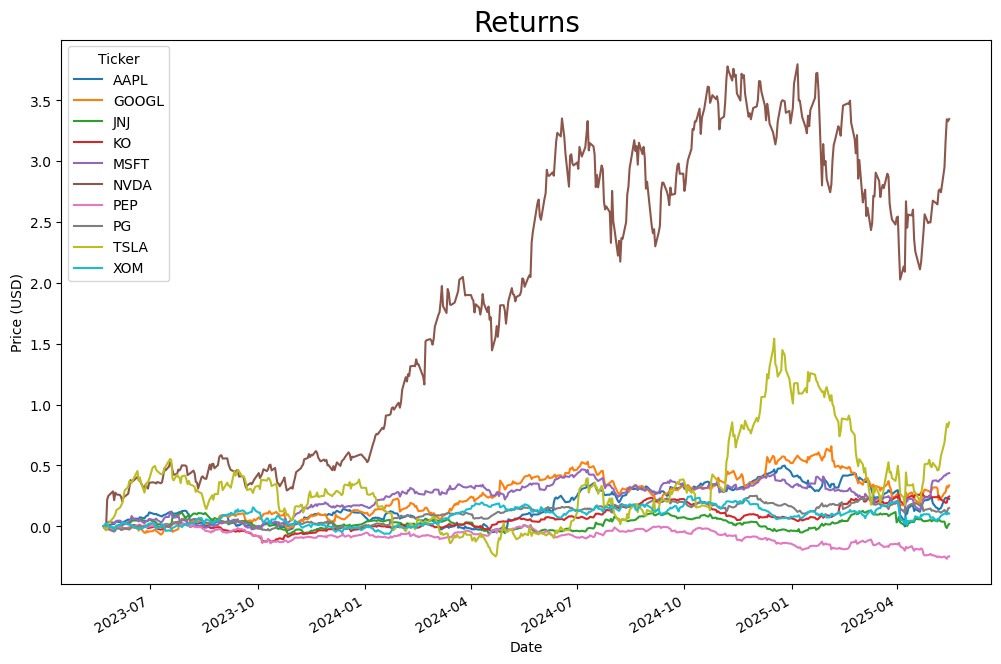

In [22]:
#Plot Cumlative Returns together
stock['Cumulative Return'].plot(figsize = (12,8))
plt.title(f'Returns', size = 20)
plt.ylabel('Price (USD)')
plt.show()

In [24]:
# daily log returns
daily_log_returns = np.log(stock['Close']/ stock['Close'].shift(1)).dropna()
print(daily_log_returns.head())


Ticker          AAPL     GOOGL       JNJ        KO      MSFT      NVDA  \
Date                                                                     
2023-05-23 -0.015271 -0.020113 -0.000382 -0.001790 -0.018604 -0.015777   
2023-05-24  0.001631 -0.013637 -0.000957 -0.008505 -0.004482 -0.004900   
2023-05-25  0.006670  0.021115 -0.014466 -0.007750  0.037737  0.218088   
2023-05-26  0.014006  0.009110 -0.000389 -0.002486  0.021160  0.025116   
2023-05-30  0.010603 -0.007572  0.000129 -0.007997 -0.005060  0.029475   

Ticker           PEP        PG      TSLA       XOM  
Date                                                
2023-05-23 -0.003059 -0.010852 -0.016550  0.013531  
2023-05-24 -0.006362 -0.008303 -0.015570  0.011122  
2023-05-25 -0.005913 -0.006445  0.008547 -0.018101  
2023-05-26 -0.001198  0.000069  0.046084 -0.006552  
2023-05-30 -0.010789 -0.015386  0.040530 -0.008899  


In [43]:
#Annualized Expected returns 
annualized_returns = daily_log_returns.mean() * 252 
print("Annualized expected returns:")
print(annualized_returns)

Annualized expected returns:
Ticker
AAPL     0.102646
GOOGL    0.146336
JNJ      0.009309
KO       0.110477
MSFT     0.183241
NVDA     0.743468
PEP     -0.144035
PG       0.070795
TSLA     0.312124
XOM      0.050145
dtype: float64


In [31]:
#Annualized Volatility
volatility = daily_log_returns.std() * np.sqrt(252)
#print(volatility)
annualized_volatility_pct=(volatility*100).round(2)
print("Annualized Volatility:")
print(annualized_volatility_pct.sort_values(ascending=False))

Annualized Volatility:
Ticker
TSLA     62.09
NVDA     54.41
GOOGL    29.90
AAPL     27.20
MSFT     23.50
XOM      22.41
PEP      18.17
JNJ      17.63
PG       16.80
KO       15.20
dtype: float64


In [45]:
#Annualized Covariance matrix 
cov_matrix = daily_log_returns.cov() * 252
print("Annualized Covariance:")
print(cov_matrix)

Annualized Covariance:
Ticker      AAPL     GOOGL       JNJ        KO      MSFT      NVDA       PEP  \
Ticker                                                                         
AAPL    0.073993  0.038077  0.001115  0.005756  0.034487  0.055875  0.007879   
GOOGL   0.038077  0.089393 -0.006144 -0.001306  0.038273  0.072013 -0.001326   
JNJ     0.001115 -0.006144  0.031097  0.011928 -0.004101 -0.027330  0.012652   
KO      0.005756 -0.001306  0.011928  0.023095  0.000266 -0.016607  0.018376   
MSFT    0.034487  0.038273 -0.004101  0.000266  0.055219  0.071461  0.001593   
NVDA    0.055875  0.072013 -0.027330 -0.016607  0.071461  0.296007 -0.016363   
PEP     0.007879 -0.001326  0.012652  0.018376  0.001593 -0.016363  0.033015   
PG      0.006316 -0.001749  0.011077  0.014859  0.002649 -0.013975  0.018248   
TSLA    0.077654  0.076787 -0.009917 -0.004292  0.060911  0.126601  0.001897   
XOM     0.012583  0.002811  0.007857  0.005767 -0.000007 -0.001108  0.007291   

Ticker        PG

In [47]:
#Compute Beta of the stocks using SPY

#download spy data. spy:proxy of market returns 
spy = yf.download('SPY', start = start_date, end =end_date)['Close']
#print(spy.head())
spy_log_returns = np.log(spy / spy.shift(1)).dropna()
#print(spy_log_returns.head())
spy_log_returns.name = 'SPY'  # Set the column name properly
aligned_returns = daily_log_returns.join(spy_log_returns, how='inner')
#print(aligned_returns.head())
beta = {}
for ticker in daily_log_returns.columns:
    cov = np.cov(aligned_returns[ticker], aligned_returns['SPY'])[0, 1]
    var = np.var(aligned_returns['SPY'])
    beta[ticker] = cov / var

beta_series = pd.Series(beta).sort_values(ascending=False)
print(beta_series)

[*********************100%***********************]  1 of 1 completed


TSLA     2.254073
NVDA     2.152469
AAPL     1.168644
GOOGL    1.119059
MSFT     1.024828
XOM      0.447835
PEP      0.185891
PG       0.168591
KO       0.133795
JNJ      0.054729
dtype: float64


In [40]:
#Get P/E (Price to Earnings) ration with yfinance

pe_ratios = {}
for t in tickers:
    try:
        stock = yf.Ticker(t)
        pe = stock.info.get('trailingPE')
        pe_ratios[t] = pe if pe is not None else float('nan')
    except:
        pe_ratios[t] = float('nan')

import pandas as pd
pe_series = pd.Series(pe_ratios)
print("P/E ratio for stocks:")
print(pe_series)



P/E ratio for stocks:
AAPL      32.906540
MSFT      35.078766
GOOGL     18.547990
TSLA     199.988570
NVDA      46.054420
KO        28.915663
JNJ       16.833149
PG        25.917460
PEP       19.408823
XOM       14.348806
dtype: float64


### Portfolio Optimization:
Now to construct two potentially profitable investment portfolios, we will set few constaints for both 
**High-Risk portfolio** and **Low-Risk Portfolio** and optimize them.

In [57]:
#utility functions for optimization

def portfolio_performance(weights, annualized_returns, cov_matrix):
    port_return = np.dot(weights, annualized_returns) #expected return of portfolio
    port_volatility = np.sqrt(weights.T @ cov_matrix @ weights) #volatility of portfolio
    return port_return, port_volatility

def neg_sharpe_ratio(weights, annualized_returns, cov_matrix, risk_free_rate=0.02):
    ret, vol = portfolio_performance(weights, annualized_returns, cov_matrix)
    return -(ret - risk_free_rate) / vol


#### High-Risk Portfolio Constraints
We consider:
-Full investment
-Volatility >=20%
-Return >=12 %
-at least 30% in high-beta stocks
-P/E ratio >=25

In [59]:
def high_risk_constraints(annualized_returns, cov_matrix, tickers, pe_series):
    high_beta_stocks = ['TSLA', 'NVDA', 'GOOGL']
    high_beta_indices = [tickers.index(t) for t in high_beta_stocks]

    return [
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # Full investment
        {'type': 'ineq', 'fun': lambda w: np.sqrt(w.T @ cov_matrix @ w) - 0.20},  # Volatility ≥ 20%
        {'type': 'ineq', 'fun': lambda w: np.dot(w, annualized_returns) - 0.12},        # Return ≥ 12%
        {'type': 'ineq', 'fun': lambda w: sum(w[i] for i in high_beta_indices) - 0.30},  # ≥30% in high-beta
        {'type': 'ineq', 'fun': lambda w: np.dot(w, pe_series.loc[tickers].values) - 25}  # P/E ≥ 25
    ]


### Low-Risk Portfolio Constraints

In [58]:
def low_risk_constraints(annualized_returns, cov_matrix, tickers, pe_series):
    high_vol_stocks = ['TSLA', 'NVDA']
    high_vol_indices = [tickers.index(t) for t in high_vol_stocks]
    defensive_stocks = ['KO', 'JNJ', 'PG', 'PEP']
    defensive_indices = [tickers.index(t) for t in defensive_stocks]

    return [
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # Full investment
        {'type': 'ineq', 'fun': lambda w: 0.15 - np.sqrt(w.T @ cov_matrix @ w)},  # Volatility ≤ 15%
        {'type': 'ineq', 'fun': lambda w: np.dot(w, annualized_returns) - 0.06},        # Return ≥ 6%
        {'type': 'ineq', 'fun': lambda w: 0.10 - sum(w[i] for i in high_vol_indices)},  # ≤10% in high-vol
        {'type': 'ineq', 'fun': lambda w: sum(w[i] for i in defensive_indices) - 0.40},  # ≥40% in defensive
        {'type': 'ineq', 'fun': lambda w: 20 - np.dot(w, pe_series.loc[tickers].values)}  # P/E ≤ 20
    ]


In [66]:
#Portfolio Optimize
def optimize_portfolio(annualized_returns, cov_matrix, constraints):
    n_assets = len(annualized_returns)
    init_guess = np.ones(n_assets) / n_assets
    min_weight = 0.05  # 5% minimum weight
    bounds = [(min_weight, 1.0)] * n_assets
    

    result = minimize(neg_sharpe_ratio, init_guess,
                      args=(annualized_returns, cov_matrix),
                      method='SLSQP',
                      bounds=bounds,
                      constraints=constraints)

    return result.x, result.success


In [67]:
#Run the optimization

# High-Risk Portfolio
constraints_high = high_risk_constraints(annualized_returns, cov_matrix, tickers, pe_series)
weights_high, success_high = optimize_portfolio(annualized_returns, cov_matrix, constraints_high)

# Low-Risk Portfolio
constraints_low = low_risk_constraints(annualized_returns, cov_matrix, tickers, pe_series)
weights_low, success_low = optimize_portfolio(annualized_returns, cov_matrix, constraints_low)


In [68]:
# Portfolio stats
ret_high, vol_high = portfolio_performance(weights_high, annualized_returns, cov_matrix)
ret_low, vol_low = portfolio_performance(weights_low, annualized_returns, cov_matrix)

# Print summary
print(f"High-Risk Portfolio:\n  Return: {ret_high:.2%}, Volatility: {vol_high:.2%}")
print(f"Low-Risk Portfolio:\n  Return: {ret_low:.2%}, Volatility: {vol_low:.2%}")

# Print weights
for i, t in enumerate(tickers):
    print(f"{t:<5} | High: {weights_high[i]:.2%} | Low: {weights_low[i]:.2%}")


High-Risk Portfolio:
  Return: 29.54%, Volatility: 20.00%
Low-Risk Portfolio:
  Return: 6.55%, Volatility: 13.28%
AAPL  | High: 5.00% | Low: 5.00%
MSFT  | High: 5.00% | Low: 5.00%
GOOGL | High: 5.00% | Low: 5.00%
TSLA  | High: 29.58% | Low: 5.00%
NVDA  | High: 5.00% | Low: 5.00%
KO    | High: 30.42% | Low: 5.00%
JNJ   | High: 5.00% | Low: 25.00%
PG    | High: 5.00% | Low: 5.00%
PEP   | High: 5.00% | Low: 5.00%
XOM   | High: 5.00% | Low: 35.00%


In [71]:
# Create a DataFrame to hold both sets of weights
weights_df = pd.DataFrame({
    'Ticker': tickers,
    'High-Risk Weight': weights_high,
    'Low-Risk Weight': weights_low
})

# Format as percentage and round to 2 decimal places
weights_df['High-Risk Weights'] = (weights_df['High-Risk Weight'] * 100).round(2)
weights_df['Low-Risk Weights'] = (weights_df['Low-Risk Weight'] * 100).round(2)

# Set ticker as index and display
weights_df.set_index('Ticker', inplace=True)
print(weights_df)


        High-Risk Weight  Low-Risk Weight  High-Risk Weights  Low-Risk Weights
Ticker                                                                        
AAPL            0.050000             0.05               5.00               5.0
MSFT            0.050000             0.05               5.00               5.0
GOOGL           0.050000             0.05               5.00               5.0
TSLA            0.295763             0.05              29.58               5.0
NVDA            0.050000             0.05               5.00               5.0
KO              0.304237             0.05              30.42               5.0
JNJ             0.050000             0.25               5.00              25.0
PG              0.050000             0.05               5.00               5.0
PEP             0.050000             0.05               5.00               5.0
XOM             0.050000             0.35               5.00              35.0
